In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
# Reading data from csv file

dataset = pd.read_csv('../DataSets/data_set_dra_updated.csv')

print("Dataset", dataset);

x = pd.DataFrame(dataset.iloc[:, 0:5].values)
y = dataset.iloc[:, 5].values

Dataset        height [mm]  rad [mm]  w1 [mm]  w2 [mm]  Freq [GHz]  dB(S(1,1)) []
0             13.0      13.0      2.0      2.0        1.00      -0.527535
1             13.0      13.0      2.0      2.0        1.01      -0.524462
2             13.0      13.0      2.0      2.0        1.02      -0.521384
3             13.0      13.0      2.0      2.0        1.03      -0.518305
4             13.0      13.0      2.0      2.0        1.04      -0.515225
...            ...       ...      ...      ...         ...            ...
86611         14.2      14.0      3.0      3.0        4.96     -16.221981
86612         14.2      14.0      3.0      3.0        4.97     -15.480723
86613         14.2      14.0      3.0      3.0        4.98     -14.659721
86614         14.2      14.0      3.0      3.0        4.99     -13.812575
86615         14.2      14.0      3.0      3.0        5.00     -12.974424

[86616 rows x 6 columns]


In [3]:
# Generating training and test data sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [4]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [9]:
# Prediction Metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

MSE = mse(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAX_ERROR = max_error(y_test, y_pred);
MEAN_ABSOLUTE_ERROR = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error", MSE)
print("R-Squared: ", R2)
print("Max Error", MAX_ERROR);
print("Mean Absolute Error", MEAN_ABSOLUTE_ERROR);

Mean Squared Error 0.3138785868040164
R-Squared:  0.9837893173373662
Max Error 30.510261673939738
Mean Absolute Error 0.11681526696237775


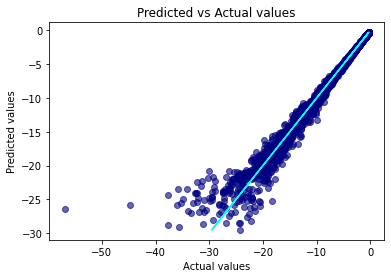

In [10]:
import matplotlib.pyplot as plt

def generatePredictionPlot(y_test, y_pred):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_pred, y_pred,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_test, y_pred)

In [13]:
# Data Samples

d1 = [14.10, 14.55, 2.25, 2.6, 2.42] #HFSS S11 = -0.37
d2 = [13.04, 13.30, 2.3, 2.7, 1.84] # HFSS S11 = -0.43
d3 = [13.19, 13.74, 2.7, 2.45, 1.95] # HFSS S11 = -0.44
d4 = [14.42, 13.12, 2.4, 2.8, 2.41] # HFSS S11 = -0.51
d5 = [13.86, 14.57, 2.8, 2.1, 2.56] #HFSS S11 = -0.77

# Predictions
preds = knn.predict([d1,d2,d3,d4,d5])

print("Predictions", preds);

Predictions [-0.31046684 -0.40640925 -0.42608377 -0.64672144 -0.4743419 ]


In [14]:
# Generating random data sets

import numpy
import pandas

SAMPLE_SIZE = 10

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

rand_rad = randomSample(13, 15, SAMPLE_SIZE)
rand_height = randomSample(13, 15, SAMPLE_SIZE)
rand_freq = randomSample(1, 5, SAMPLE_SIZE)
rand_w1 = randomSample(2.5, 3.5, SAMPLE_SIZE)
rand_w2 = randomSample(2.5, 3.5, SAMPLE_SIZE)

rand_x = []
for i in range(0,SAMPLE_SIZE):
    rand_x.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i]])

y_pred_rand = knn.predict(rand_x)

output = []
for i in range(0, SAMPLE_SIZE):
    output.append([rand_height[i], rand_rad[i], rand_freq[i], rand_w1[i], rand_w2[i], y_pred_rand[i]])
    
# Creating Dataframe
output_df = pandas.DataFrame(output, columns= ["Height", "Radius", "W1", "W2", "Frequency", "S11"])
print("Predicted Values for random samples\n")
print(output_df)

Predicted Values for random samples

   Height  Radius    W1    W2  Frequency        S11
0   13.92   14.26  4.14  3.43       3.42  -2.678779
1   14.71   13.78  1.21  3.01       3.36  -0.431912
2   13.99   14.70  2.26  3.40       2.93  -0.664142
3   14.99   14.86  4.14  2.90       2.94  -2.610883
4   14.30   14.98  4.42  2.61       3.12  -4.583861
5   13.93   14.60  1.03  3.45       3.16  -0.480022
6   13.28   13.01  3.35  3.19       2.84 -16.084658
7   13.27   13.05  3.25  3.25       3.39  -7.775108
8   14.12   13.41  2.11  3.36       3.26  -0.655939
9   14.04   13.77  3.79  2.55       2.61  -2.049935
